In [18]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [19]:
data=pd.read_csv('invest.txt',sep=' ')
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


<Axes: xlabel='gnp'>

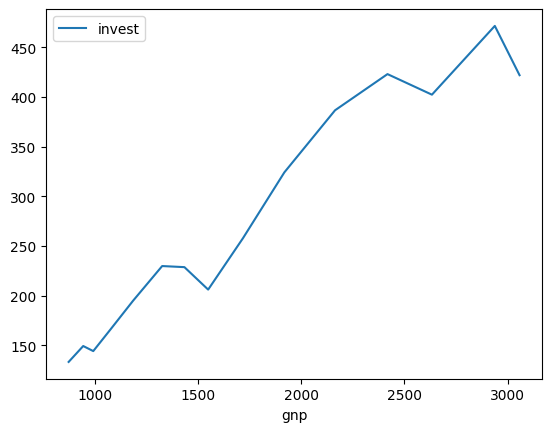

In [20]:
data.plot(x='gnp', y='invest')

<Axes: xlabel='gnp'>

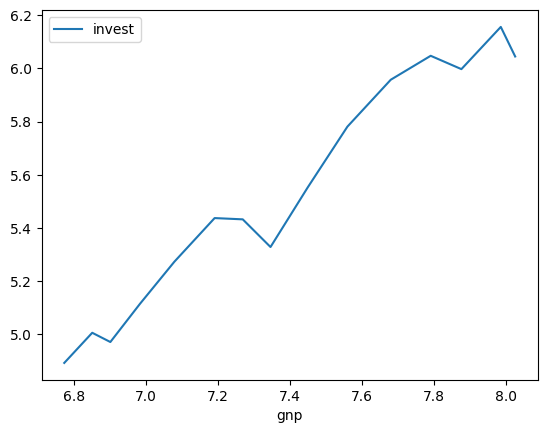

In [21]:
#log transformation
data['gnp']=np.array([np.log(x) for x in data['gnp'].tolist()])
data['invest']=np.array([np.log(x) for x in data['invest'].tolist()])
data.plot(x='gnp', y='invest')

In [22]:
n=len(data['gnp'])
beta_1= np.sum([(data['gnp'][i]-data['gnp'].mean())*(data['invest'][i]-data['invest'].mean()) for i in range(n)])/np.sum([(data['gnp'][i]-data['gnp'].mean())**2 for i in range(n)])
beta_0= data['invest'].mean()-data['gnp'].mean()*beta_1
sigma2=np.sum([(data['invest'][i]-beta_0-beta_1*data['gnp'][i])**2 for i in range(n)])/(n-2)
std_beta_0 = np.sqrt(sigma2*(1/n+ data['gnp'].mean()**2/np.sum([(data['gnp'][i]-data['gnp'].mean())**2 for i in range(n)])))
std_beta_1=np.sqrt(sigma2/np.sum([(x-data['gnp'].mean())**2 for x in data['gnp']]))
R2=np.sum([(beta_0+beta_1*x-data['invest'].mean())**2 for x in (data['gnp'])])/np.sum([(y-data['invest'].mean())**2 for y in (data['invest'])])


print('slope :', beta_1 , '\n' + 'intercept :',  beta_0 , '\n' + 'Variance of the intercept', std_beta_0 , '\n' + 'Variance of the slope',std_beta_1 ,'\n'+ 'Ordinary least square determination coefficient :', R2 )

slope : 1.015281401598871 
intercept : -1.9635913352301815 
Variance of the intercept 0.40954727166230726 
Variance of the slope 0.05538306035485269 
Ordinary least square determination coefficient : 0.9627572956057854


In [23]:
t_0= beta_0/std_beta_0
t_1=beta_1/std_beta_1
print('t_student distribution  interval :', t.interval(0.95,n-2) )
print('beta_1/std_beta_1 :', t_1)
print( 'We can reject H_0')

#p is the smallest value such that 0 belong to [beta_1 - t(1-p/2)std_beta_1, beta_1 + t(1-p/2)std_beta_1 ]
def calculate_p_value(value):
    if value>0:
        return 2-2*t.cdf(value,n-2)
    else:
        return 2+2*t.cdf(value,n-2)

print('The p-value is : ', calculate_p_value(t_1))



t_student distribution  interval : (-2.1603686564610127, 2.1603686564610127)
beta_1/std_beta_1 : 18.33198445686672
We can reject H_0
The p-value is :  1.1363709973011282e-10


In [24]:
Invest1000=beta_0+beta_1*np.log(1000)
def CI(x,alpha,data):
    return [beta_0+beta_1*x-t.ppf(1-alpha/2,n-2)*np.sqrt(sigma2)*np.sqrt(1/n+(x-data.mean())**2/np.sum([(xi-data.mean())**2 for xi in data])),beta_0+beta_1*x+t.ppf(1-alpha/2,n-2)*np.sqrt(sigma2)*np.sqrt(1/n+(x-data.mean())**2/np.sum([(xi-data.mean())**2 for xi in data]))]
def PI(x,alpha,data):
    return [beta_0+beta_1*x-t.ppf(1-alpha/2,n-2)*np.sqrt(sigma2)*np.sqrt(1+1/n+(x-data.mean())**2/np.sum([(xi-data.mean())**2 for xi in data])),beta_0+beta_1*x+t.ppf(1-alpha/2,n-2)*np.sqrt(sigma2)*np.sqrt(1+1/n+(x-data.mean())**2/np.sum([(xi-data.mean())**2 for xi in data]))]

print('Estimated investment for GNP value 1000 (in log scale) :', Invest1000)
print('Associated confidence interval :', CI(np.log(1000),0.1,data['gnp']))
print('Associated prediction interval :',  PI(np.log(1000),0.1,data['gnp']))

Estimated investment for GNP value 1000 (in log scale) : 5.049724126316802
Associated confidence interval : [4.98822284597111, 5.111225406662493]
Associated prediction interval : [4.882820023438682, 5.216628229194922]


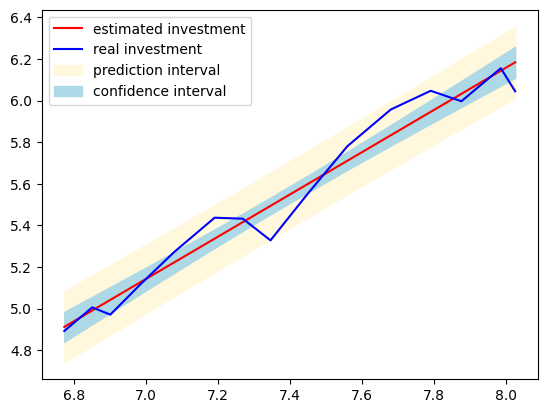

In [25]:
estimated_invest=[beta_0+beta_1*x for x in data['gnp']]
lower_confidence_int=[CI(x,0.1,data['gnp'])[0] for x in data['gnp']]
upper_confidence_int=[CI(x,0.1,data['gnp'])[1] for x in data['gnp']]
lower_pred_int=[PI(x,0.1,data['gnp'])[0] for x in data['gnp']]
upper_pred_int=[PI(x,0.1,data['gnp'])[1] for x in data['gnp']]
plt.plot(data['gnp'].tolist(),estimated_invest,label='estimated investment',color='r')
plt.plot(data['gnp'].tolist(),data['invest'].tolist(),label='real investment',color='b')
plt.fill_between(data['gnp'].tolist(),lower_pred_int,upper_pred_int,color='cornsilk',alpha=1)
plt.fill_between(data['gnp'].tolist(),lower_confidence_int,upper_confidence_int,color='lightblue',alpha=1)
plt.legend(['estimated investment','real investment','prediction interval','confidence interval'])
plt.show()

In [26]:
X=np.array([[x] for x in data['gnp']])
Y=np.array([[y] for y in data['invest']])
reg=LinearRegression().fit(X,Y)
print('slope :', reg.coef_[0][0], '\n'  + 'intercept :',  reg.intercept_[0] ,'\n'+ 'Ordinary least square determination coefficient :', reg.score(X,Y))
print('Estimated investment for gnp of value 1000 :', reg.predict(np.array([[np.log(1000)]]))[0][0] )

slope : 1.0152814015988711 
intercept : -1.9635913352301833 
Ordinary least square determination coefficient : 0.9627572956057855
Estimated investment for gnp of value 1000 : 5.049724126316802


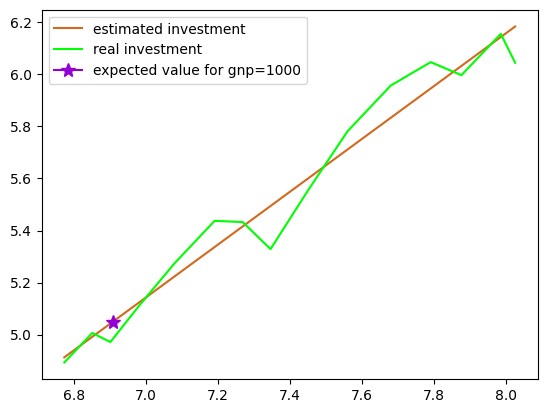

In [27]:
estimated_invest=[reg.predict(np.array([[x]]))[0][0] for x in data['gnp']]
plt.plot(data['gnp'].tolist(),estimated_invest,label='estimated investment',color='chocolate')
plt.plot(data['gnp'].tolist(),data['invest'].tolist(),label='real investment',color='lime')
plt.plot([np.log(1000)], reg.predict(np.array([[np.log(1000)]]))[0],color='darkviolet',marker='*',markersize=10)
plt.legend(['estimated investment','real investment','expected value for gnp=1000'])
plt.show()

In [28]:
#gram matrix computation
X=np.array([np.array([1 for x in data['gnp']]),np.array(data['gnp'].tolist()),np.array(data['interest'].tolist())])
G=X@np.transpose(X)
print(np.linalg.matrix_rank(G))
p=np.linalg.matrix_rank(G)
#It is full rank

3


In [32]:
reg_coeff=np.linalg.inv(G)@X@np.array(data['invest'].tolist())
Y_hat=reg_coeff@X 
Y_hat
sigma2=np.sum(np.array([(Y_hat[i] -Y[i])**2 for i in range(len(Y))]))/(n-p-1)
sigma2

def computeR2(Xd,Y):
    #Gram matrix computation
    X=np.array([[1 if i==0 else lst[i-1] for i in range(len(lst)+1)] for lst in Xd])    #it corresponds to the transpose of the design matrix of Xd
    G=np.transpose(X)@X
    reg_coeff=np.linalg.inv(G)@np.transpose(X)@Y
    Y_hat=X@reg_coeff 
    return np.sum([(y_hat-Y.mean())**2 for y_hat in Y_hat])/np.sum([(y-Y.mean())**2 for y in Y])

def computeMSE(Xd,Y):
    #Gram matrix computation
    X=np.array([[1 if i==0 else lst[i-1] for i in range(len(lst)+1)] for lst in Xd]) #it corresponds to the transpose of the design matrix of Xd
    G=np.transpose(X)@X
    reg_coeff=np.linalg.inv(G)@np.transpose(X)@Y
    Y_hat=X@reg_coeff 

0.008937199587839785